# ESA descriptive analysis

Import all depencies

In [1]:
import pandas as pd
import sklearn.cluster
import sklearn.decomposition

import os.path
import sys

%load_ext autoreload
%autoreload 1

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("src"), "../src")))

%aimport features.normalizer
%aimport features.tools
%aimport data.tools
%aimport data.esa
%aimport models
%aimport visualization.simple

In [3]:
import data.esa

import features.normalizer
import features.tools

import visualization.simple

read and clean data

In [4]:
data_frame, columns = data.esa.data_set()
data_frame.head()

,Date,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,...,ESA_BB,ESA_BC,ESA_BD,ESA_BE,ESA_BF,ESA_BG,ESA_BH,ESA_BI,ESA_BJ,ESA_BK
0,T1/2000,36.7,574.1,259.0,299.6,12.4,187.2,81.2,359.0,503.7,...,199.5,1413.5,248.2,239.2,368.5,647.1,241.2,488.6,376.4,589.0
1,T2/2000,36.6,578.2,256.4,300.7,12.8,186.2,82.1,361.8,507.1,...,202.9,1457.1,247.9,240.0,373.2,655.4,241.5,487.0,377.4,620.6
2,T3/2000,36.5,580.1,253.9,301.4,12.9,185.2,82.8,364.6,515.0,...,206.9,1483.1,247.9,240.5,377.2,662.8,238.7,487.5,378.5,632.9
3,T4/2000,36.3,582.0,251.4,302.6,13.0,185.0,83.7,368.0,519.8,...,210.0,1475.9,247.6,242.3,379.8,667.8,247.8,493.8,379.7,614.5
4,T1/2001,36.1,582.1,249.9,302.0,12.8,184.8,85.1,368.8,523.7,...,211.9,1511.3,247.3,242.8,382.8,672.4,246.8,494.1,381.1,636.0


sum all sectors

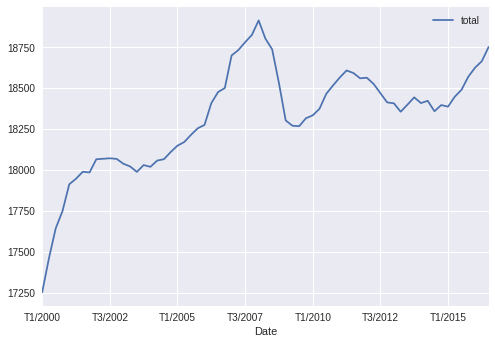

In [5]:
sum_data = data_frame.copy().drop("Date", axis=1).sum(axis=1)
sum_data = pd.concat([sum_data, data_frame[["Date"]]], axis=1)
sum_data.columns = ["total", "Date"]

visualization.simple.temporal(sum_data)

extract 4 ranges and and compute sum of them

In [6]:
d1 = pd.DataFrame(data_frame.head(16).sum(axis=0)).transpose()
d2 = pd.DataFrame(data_frame.iloc[48:64].sum(axis=0)).transpose()
d3 = pd.DataFrame(data_frame.iloc[16:32].sum(axis=0)).transpose()
d4 = pd.DataFrame(data_frame.iloc[32:48].sum(axis=0)).transpose()
q_data = pd.concat([d1, d3, d4, d2]).reset_index(drop=True)
q_data = q_data.drop("Date", axis=1)
q_data.head()

,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,ESA_AJ,...,ESA_BB,ESA_BC,ESA_BD,ESA_BE,ESA_BF,ESA_BG,ESA_BH,ESA_BI,ESA_BJ,ESA_BK
0,560.5,9366,3747.3,4709.5,206.8,2932.8,1392.7,5816.7,8188.1,2960.4,...,3385.4,23806.6,3956.9,3984.3,6294.7,11057.9,3935.9,8010.5,6237.5,9377.3
1,455.9,9200.2,2684.5,4153.3,211.5,2677.4,1432,5465.6,7425.3,2636.1,...,3542.7,25592.3,3757.8,4340.6,7070.4,12414.5,3913.3,8213.3,7213.5,9803.4
2,404.6,8869.4,1998.9,3566.1,185.2,2364.5,1362.2,4904.9,6701.1,2333.5,...,3374.9,25772.4,3710.7,4713,7635.1,13903.1,4268.7,8665.5,7881.5,8845.7
3,361.3,8785.9,1716.8,3100.2,157.8,2257.8,1284.4,4430.2,6269.9,2183,...,3300.9,26148,3533.5,4925.6,7988.6,15151.4,4445.2,8821.4,7248.4,8573.8


## jobs by sectors

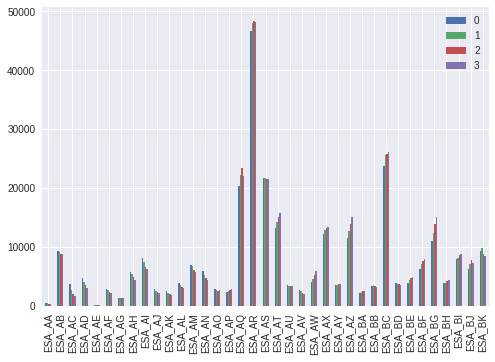

In [7]:
d = q_data.copy().transpose()

visualization.simple.bar(d)

## Percentage of jobs by sectors

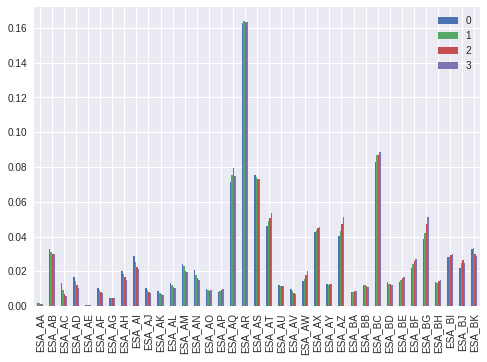

In [8]:
n_data = d / d.sum()

visualization.simple.bar(n_data)

# Correlation of all sectors

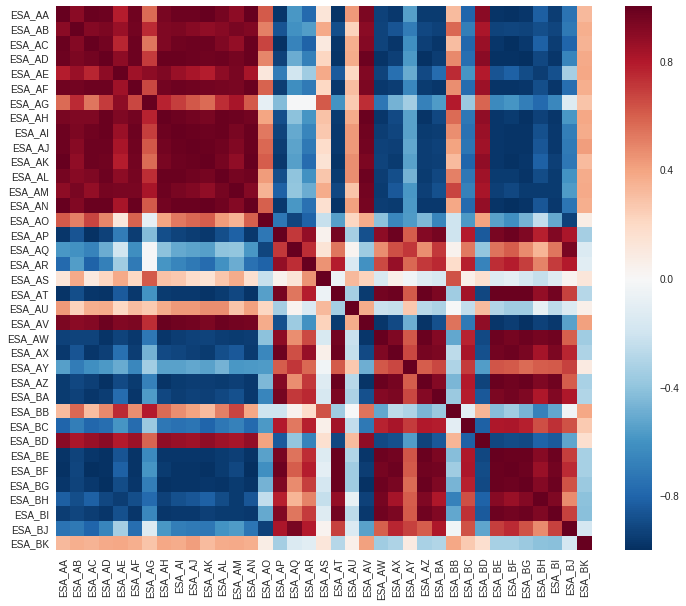

In [9]:
corr = data_frame.corr()

visualization.simple.heat_map(corr, corr.columns.values, corr.columns.values, (12, 10))

In [10]:
d_c = data_frame.copy().drop("Date", axis=1)
norm_data = features.normalizer.simple_min_max(d_c)
norm_data = pd.concat([data_frame[["Date"]], norm_data], axis=1)

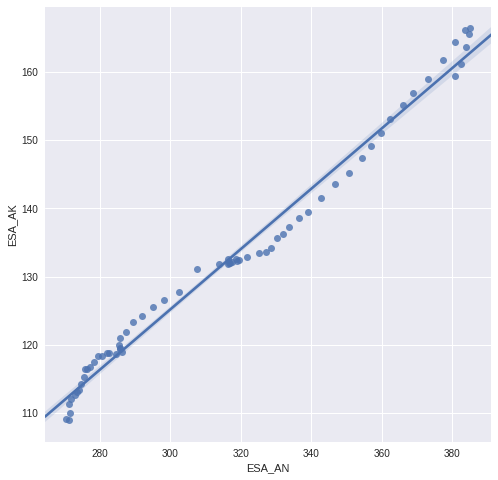

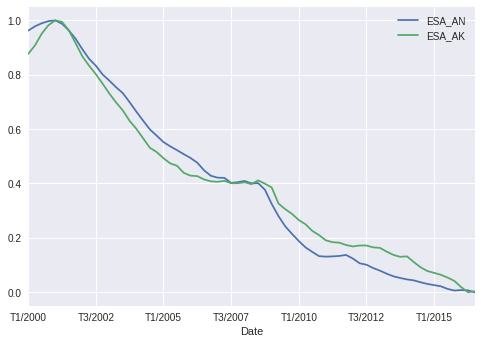

In [11]:
visualization.simple.linear_regression(data_frame, "ESA_AN", "ESA_AK", (8, 8))
visualization.simple.temporal(norm_data, ["ESA_AN", "ESA_AK"])

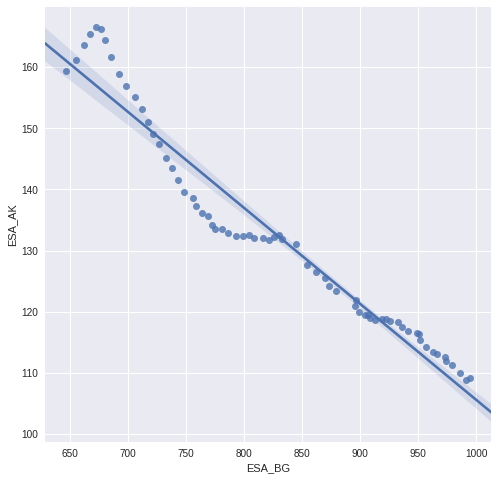

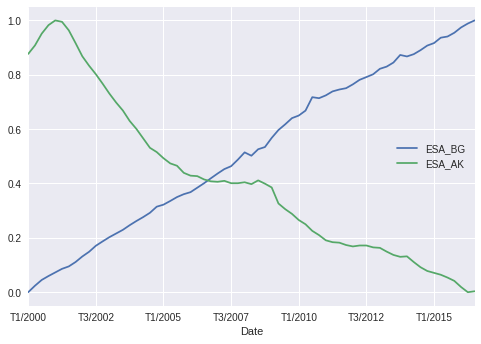

In [12]:
visualization.simple.linear_regression(data_frame, "ESA_BG", "ESA_AK", (8, 8))
visualization.simple.temporal(norm_data, ["ESA_BG", "ESA_AK"])

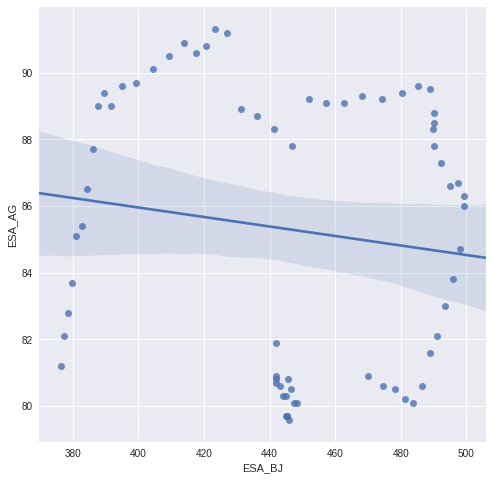

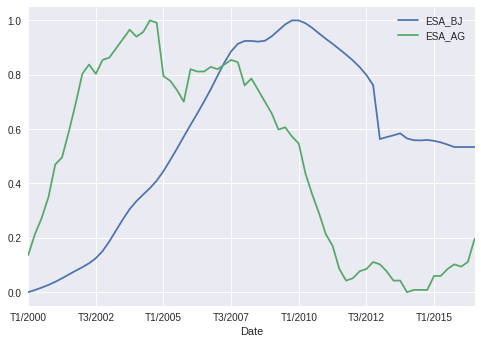

In [13]:
visualization.simple.linear_regression(data_frame, "ESA_BJ", "ESA_AG", (8, 8))
visualization.simple.temporal(norm_data, ["ESA_BJ", "ESA_AG"])

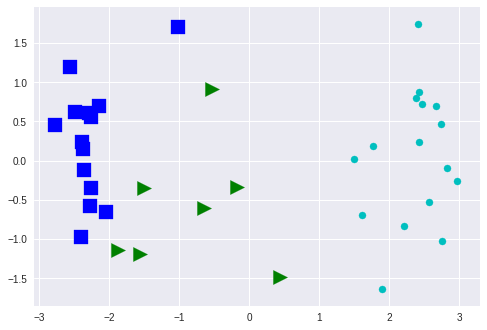

In [14]:
s_data = norm_data.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)

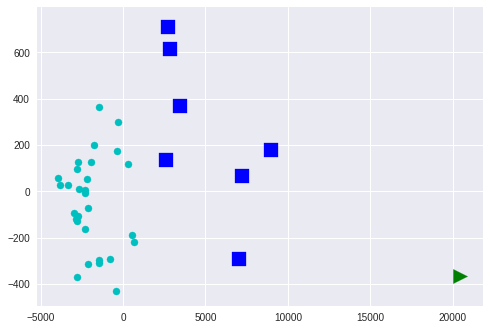

In [15]:
s_data = data_frame.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)